---
---

### **✅ 1. 데이터 준비 및 정리**

#### 🛠️ **진행 단계**
**1.1 데이터 불러오기**  
- CSV 파일에 저장된 키포인트 데이터를 **Pandas** 사용해서 가져오기

**1.2 결측치 처리**  
- 키포인트의 `x`와 `y` 값에 결측치(`NaN`)가 있는 경우 아래와 같이 처리
    - **옵션 1**: 결측치 삭제  
    - **옵션 2**: **interpolation(보간법)** 으로 (평균값, 중간값) 대체

---

### ✅ 2. EDA (Keypoint Analysis for Anomalous Behavior Detection)

#### 📌 **목표**  
- 무단횡단과 같은 돌발 행동의 특성을 정의하고, 데이터에서 이를 탐지하기 위한 핵심 지표를 설정.  
- 특정 키포인트(손, 어깨, 무릎, 발목)의 움직임 패턴이 돌발 행동과 연관성이 있는지 확인.

#### 🛠️ **진행 단계**
**2.1 특성 정의**  
    - **손 (left_wrist, right_wrist):** 갑작스러운 흔들림, 불규칙적인 움직임.  
    - **어깨 (left_shoulder, right_shoulder):** 상체의 전체적인 움직임과 강한 상관관계.  
    - **무릎 (left_knee, right_knee) 및 발목 (left_ankle, right_ankle):** 방향 전환 및 빠른 속도.  

**2.2 데이터 확인 및 필터링**  
    - `filtered_keypoints_interpolated.csv`에서 필요한 키포인트(`head`, `neck`, `left_shoulder`, `right_shoulder`, `left_wrist`, `right_wrist`,`left_ankle`, `right_ankle`)를 선택하여 분석.

---

### ✅ 3. 히트맵 상관관계 기반 키포인트 선택

#### 📌 **목표**  
- 키포인트 간의 움직임 상관관계를 확인하여 돌발 행동 예측에 중요한 키포인트를 선택.

#### 🛠️ **진행 단계**

**3.1 어깨와 손의 상관관계**  
- 어깨(`left_shoulder`, `right_shoulder`)와 손(`left_wrist`, `right_wrist`) 간의 상관관계를 분석하여 상체 움직임의 패턴 확인.

**3.2 무릎과 발목의 상관관계**  
- 무릎(`left_knee`, `right_knee`)과 발목(`left_ankle`, `right_ankle`)의 연관성을 확인하여 이동 방향 전환 및 속도와의 관계 분석.

**3.3 특정 키포인트의 상관관계**
- 상관계수가 높은 키포인트를 확인하여 돌발 행동과의 연관성을 분석.  
- <예시>  
- `left_knee`와 `right_knee` 간 상관관계가 높다면 대칭적인 다리 움직임이 돌발 행동의 중요한 지표일 수 있음.  
- `right_wrist`와 `right_shoulder` 간 상관관계가 높다면 손과 어깨의 연관성을 기반으로 상체 움직임 분석 가능.

---

### ✅ 4. 키포인트 선택 및 속도 변화 패턴 분석

#### 📌 **분석 목표**  
- 시간에 따른 키포인트의 속도 변화 및 이상 행동 패턴을 분석하여 돌발 행동을 탐지.

### 🛠️ **진행 단계**
**4.1 속도 계산**  
- 시간 순으로 데이터 정렬.  
- 유클리드 거리 기반 속도 계산:  
 $$ \text{속도 (Velocity)} = \frac{\Delta 거리}{\Delta 시간} $$

**4.2 거리 계산**  
- 거리 = $$ \sqrt{\Delta x^2 + \Delta y^2} $$  

**4.3 속도 시각화**
- 특정 키포인트의 시간에 따른 속도 변화를 시각화.  
- 급격한 속도 변화가 발생하는 키포인트를 탐지하여 돌발 행동의 가능성을 분석.

---

### ✅ 5. 결론 및 논리적 분석 방향

#### 📌 **목표**  
- `dancer_height`와 키포인트의 상관관계 분석을 통해 체형에 따른 움직임의 특징을 확인.  
- 속도와 가속도 변화 패턴을 통해 돌발 행동을 탐지.

### 🛠️ **진행 단계**
### 5.1 **dancer_height와 키포인트 상관관계 분석**  
- 보행자 체형에 따른 움직임 특징을 분석하여 모델의 일반화 가능성을 평가.  

#### 5.2 **속도 변화 패턴 분석**  
- 특정 키포인트에서 속도와 가속도의 급격한 변화가 발생할 경우 이를 돌발 행동으로 간주.

#### 5.3 **상체-하체 협응 분석**  
- 어깨와 손(상체) 움직임이 무릎과 발목(하체)의 움직임과 연관될 때 발생하는 패턴을 감지.

---
---




### **✅ 1. 데이터 준비 및 정리**

#### 🛠️ **진행 단계**
**1.1 데이터 불러오기**  
- CSV 파일에 저장된 키포인트 데이터를 **Pandas** 사용해서 가져오기

In [1]:
import pandas as pd

file_path = 'filtered_keypoints.csv'
df = pd.read_csv(file_path)

display(df)

,file_name,dancer_height,keypoint_name,x,y
0,MC01_A02_B031_CA1_M0005_2925.json,171,head,2289.192722,968.666352
1,MC01_A02_B031_CA1_M0005_2925.json,171,neck,2185.559677,942.747408
2,MC01_A02_B031_CA1_M0005_2925.json,171,left_wrist,NaN,NaN
3,MC01_A02_B031_CA1_M0005_2925.json,171,right_wrist,2218.533828,1303.256362
4,MC01_A02_B031_CA1_M0005_2925.json,171,left_shoulder,NaN,NaN
...,...,...,...,...,...
280763,MC01_A02_B021_CA1_M0001_300.json,176,right_wrist,1790.119053,1119.451274
280764,MC01_A02_B021_CA1_M0001_300.json,176,left_shoulder,2049.292973,858.366584
280765,MC01_A02_B021_CA1_M0001_300.json,176,right_shoulder,1890.899099,880.767030
280766,MC01_A02_B021_CA1_M0001_300.json,176,left_ankle,2131.174552,1441.687371


**1.2 결측치 처리**  
- 키포인트의 `x`와 `y` 값에 결측치(`NaN`)가 있는 경우 아래와 같이 처리
    - **옵션 1**: 결측치 삭제  
    - **옵션 2**: **interpolation(보간법)** 으로 (평균값, 중간값) 대체

In [2]:
'''결측치 비율 먼저 확인 진행'''

import pandas as pd

# CSV 파일 불러오기
file_path = 'filtered_keypoints.csv'
df = pd.read_csv(file_path)

# 결측치 비율 계산
missing_ratio = df.isnull().sum() / len(df) * 100

# 결과 출력
print("결측치 비율:")
print(missing_ratio)

# 결측치 비율을 시각적으로 보기 위해 정렬하여 출력
missing_ratio_sorted = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
print("\n결측치 비율이 있는 컬럼들:")
print(missing_ratio_sorted)

결측치 비율:
file_name         0.000000
dancer_height     0.000000
keypoint_name     0.000000
x                11.197501
y                11.197501
dtype: float64

결측치 비율이 있는 컬럼들:
x    11.197501
y    11.197501
dtype: float64


---

#### 📊 <font color="skyblue">**Analysis 1**</font>

- 옵션2(보간법)을 사용하는 것이 합리적임
- 이유 : 
    - 결측치 비율이 전체의 <font color="orange">**11.2%**</font> 로 상대적으로 높기 때문에 삭제 시 데이터 손실 우려가 있음
    - 좌표 데이터(x, y)는 시계열 데이터나 연속 좌표 값으로 볼 수 있으므로 linear 보간법이 유효하다고 판단함

---

In [3]:
import pandas as pd

# CSV 파일 불러오기
file_path = 'filtered_keypoints.csv'
df = pd.read_csv(file_path)

# 결측치 확인
print("Before Interpolation:")
print(df.isnull().sum())

#결측치 -> 보간
df_interpolated = df.interpolate(method='linear')  # 선형 보간
df_interpolated = df_interpolated.ffill().bfill()  # 앞뒤 값으로 보간

# 결과 확인
print("\nAfter Interpolation:")
print(df_interpolated.isnull().sum())

# 보간된 데이터 저장
df_interpolated.to_csv('filtered_keypoints_interpolated.csv', index=False)
print("Interpolated data saved to 'filtered_keypoints_interpolated.csv'")

print("\nRemaining NaN values:")
print(df_interpolated.isnull().sum())


Before Interpolation:
file_name            0
dancer_height        0
keypoint_name        0
x                31439
y                31439
dtype: int64

After Interpolation:
file_name        0
dancer_height    0
keypoint_name    0
x                0
y                0
dtype: int64


/var/folders/67/snyb_zl92233rv14z8hfg7wr0000gn/T/ipykernel_6452/780440882.py:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear')  # 선형 보간


Interpolated data saved to 'filtered_keypoints_interpolated.csv'

Remaining NaN values:
file_name        0
dancer_height    0
keypoint_name    0
x                0
y                0
dtype: int64


In [4]:
df2 = pd.read_csv('filtered_keypoints_interpolated.csv')

df2.head(9)


,file_name,dancer_height,keypoint_name,x,y
0,MC01_A02_B031_CA1_M0005_2925.json,171,head,2289.192722,968.666352
1,MC01_A02_B031_CA1_M0005_2925.json,171,neck,2185.559677,942.747408
2,MC01_A02_B031_CA1_M0005_2925.json,171,left_wrist,2202.046753,1123.001885
3,MC01_A02_B031_CA1_M0005_2925.json,171,right_wrist,2218.533828,1303.256362
4,MC01_A02_B031_CA1_M0005_2925.json,171,left_shoulder,2154.940823,1123.001885
5,MC01_A02_B031_CA1_M0005_2925.json,171,right_shoulder,2091.347818,942.747408
6,MC01_A02_B031_CA1_M0005_2925.json,171,left_ankle,2086.048401,1361.573987
7,MC01_A02_B031_CA1_M0005_2925.json,171,right_ankle,2080.748984,1780.400566
8,MC01_A09_B099_CA1_M0007_3870.json,161,head,1745.031670,1113.347145


### ✅ 2. EDA (Keypoint Analysis for Anomalous Behavior Detection)

#### 📌 **목표**  
- 무단횡단과 같은 돌발 행동의 특성을 정의하고, 데이터에서 이를 탐지하기 위한 핵심 지표를 설정. 
- 특정 키포인트(손, 어깨, 무릎, 발목)의 움직임 패턴이 돌발 행동과 연관성이 있는지 확인

#### 🛠️ **진행 단계**
**2.1 특성 정의**  
- 손 (left_wrist, right_wrist) : 갑작스러운 흔들림, 불규칙적인 움직임
- 어깨 (left_shoulder, right_shoulder) : 상체의 전체적인 움직임과 강한 상관관계
- 무릎 (left_knee, right_knee) 및 발목 (left_ankle, right_ankle) : 방향 전환 및 빠른 속도

**2.2 데이터 확인 및 필터링**  
- `filtered_keypoints_interpolated.csv`에서 필요한 키포인트(`head`, `neck`, `left_shoulder`, `right_shoulder`, `left_wrist`, `right_wrist`,`left_ankle`, `right_ankle`)를 선택하여 분석


In [5]:
#데이터 확인

import pandas as pd

# 데이터 로드
file_path = 'filtered_keypoints_interpolated.csv'
df = pd.read_csv(file_path)

# 필요한 키포인트만 필터링
keypoints = ['head', 'neck', 'left_shoulder', 'right_shoulder', 'left_wrist', 'right_wrist', 'left_ankle', 'right_ankle']
df_filtered = df[df['keypoint_name'].isin(keypoints)]

# 데이터 확인
print(df_filtered.head())
print("Unique Keypoints:", df_filtered['keypoint_name'].unique())


                           file_name  dancer_height  keypoint_name  \
0  MC01_A02_B031_CA1_M0005_2925.json            171           head   
1  MC01_A02_B031_CA1_M0005_2925.json            171           neck   
2  MC01_A02_B031_CA1_M0005_2925.json            171     left_wrist   
3  MC01_A02_B031_CA1_M0005_2925.json            171    right_wrist   
4  MC01_A02_B031_CA1_M0005_2925.json            171  left_shoulder   

             x            y  
0  2289.192722   968.666352  
1  2185.559677   942.747408  
2  2202.046753  1123.001885  
3  2218.533828  1303.256362  
4  2154.940823  1123.001885  
Unique Keypoints: ['head' 'neck' 'left_wrist' 'right_wrist' 'left_shoulder' 'right_shoulder'
 'left_ankle' 'right_ankle']


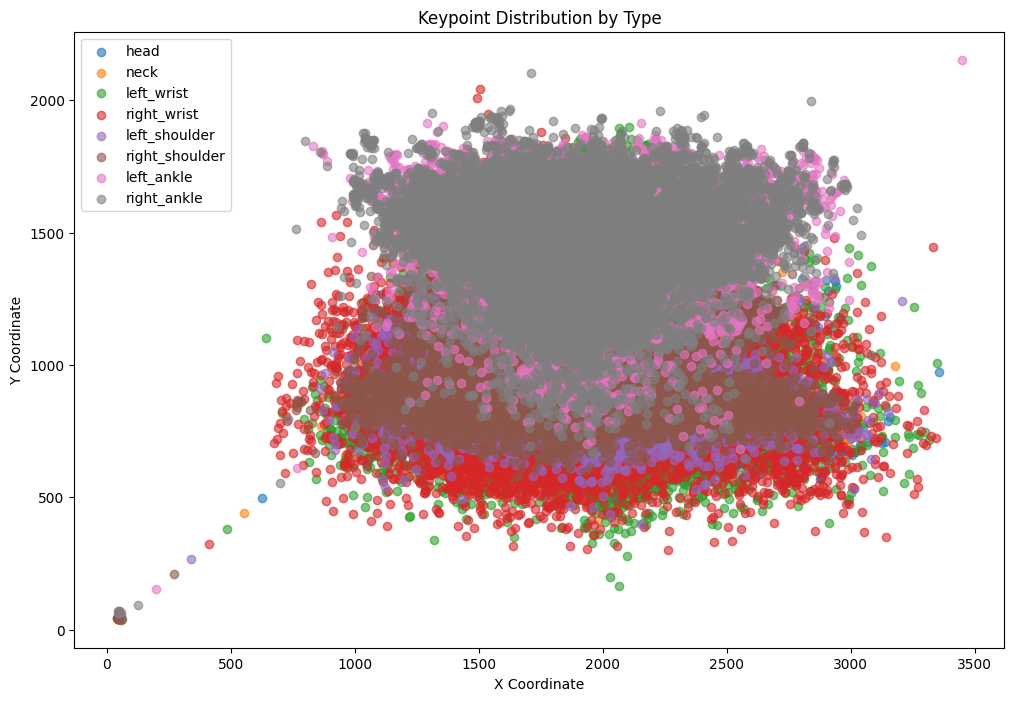

In [6]:
# 8개 키포인트 전체적인 상관관계 분석1

import matplotlib.pyplot as plt

# 키포인트별로 그룹화하여 시각화
plt.figure(figsize=(12, 8))
keypoints = df_interpolated['keypoint_name'].unique()

for keypoint in keypoints:
    subset = df_interpolated[df_interpolated['keypoint_name'] == keypoint]
    plt.scatter(subset['x'], subset['y'], label=keypoint, alpha=0.6)

plt.title('Keypoint Distribution by Type')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


### ✅ 3. 히트맵 상관관계 기반 키포인트 선택

#### 📌 **목표**  
- 키포인트 간의 움직임 상관관계를 확인하여 돌발 행동 예측에 중요한 키포인트를 선택.

#### 🛠️ **진행 단계**

**3.1 어깨와 손의 상관관계**  
- 어깨(`left_shoulder`, `right_shoulder`)와 손(`left_wrist`, `right_wrist`) 간의 상관관계를 분석하여 상체 움직임의 패턴 확인.

**3.2 무릎과 발목의 상관관계**  
- 무릎(`left_knee`, `right_knee`)과 발목(`left_ankle`, `right_ankle`)의 연관성을 확인하여 이동 방향 전환 및 속도와의 관계 분석.

**3.3 특정 키포인트의 상관관계**
- 상관계수가 높은 키포인트를 확인하여 돌발 행동과의 연관성을 분석.  
- <예시>  
- `left_knee`와 `right_knee` 간 상관관계가 높다면 대칭적인 다리 움직임이 돌발 행동의 중요한 지표일 수 있음.  
- `right_wrist`와 `right_shoulder` 간 상관관계가 높다면 손과 어깨의 연관성을 기반으로 상체 움직임 분석 가능.

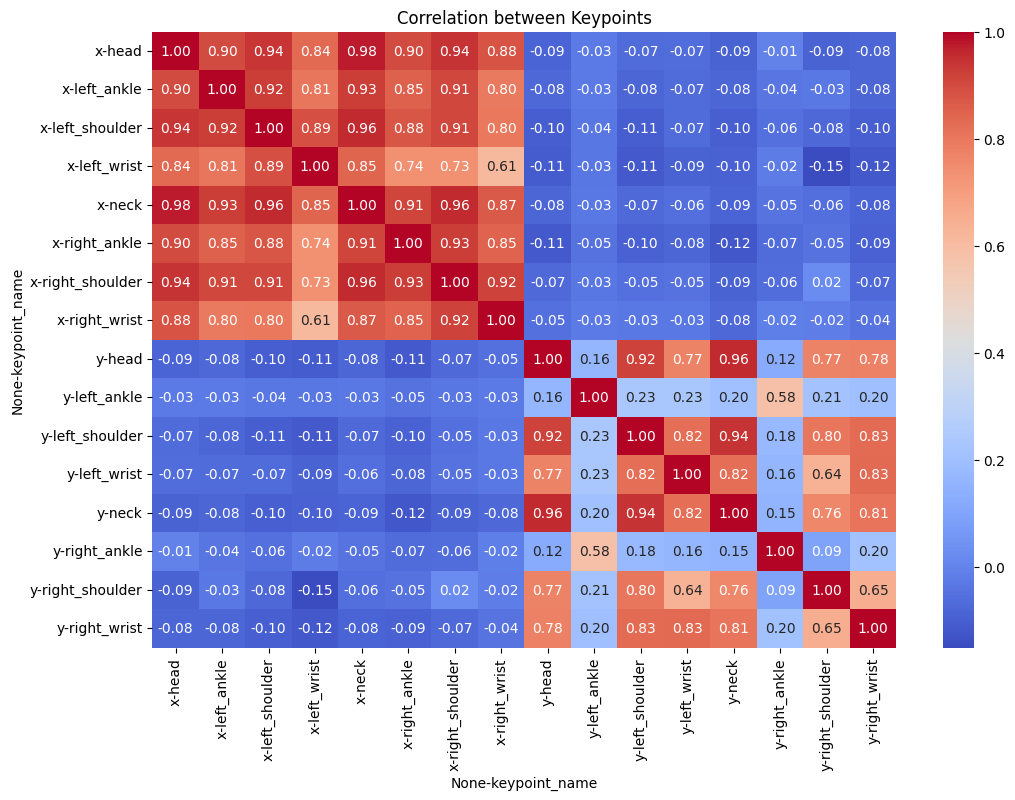

In [8]:
# 중복 제거
df_interpolated = df_interpolated.drop_duplicates(subset=['file_name', 'keypoint_name'])

# 피벗 테이블 생성
correlation_matrix = df_interpolated.pivot(index='file_name', columns='keypoint_name', values=['x', 'y']).corr()

# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between Keypoints')
plt.show()


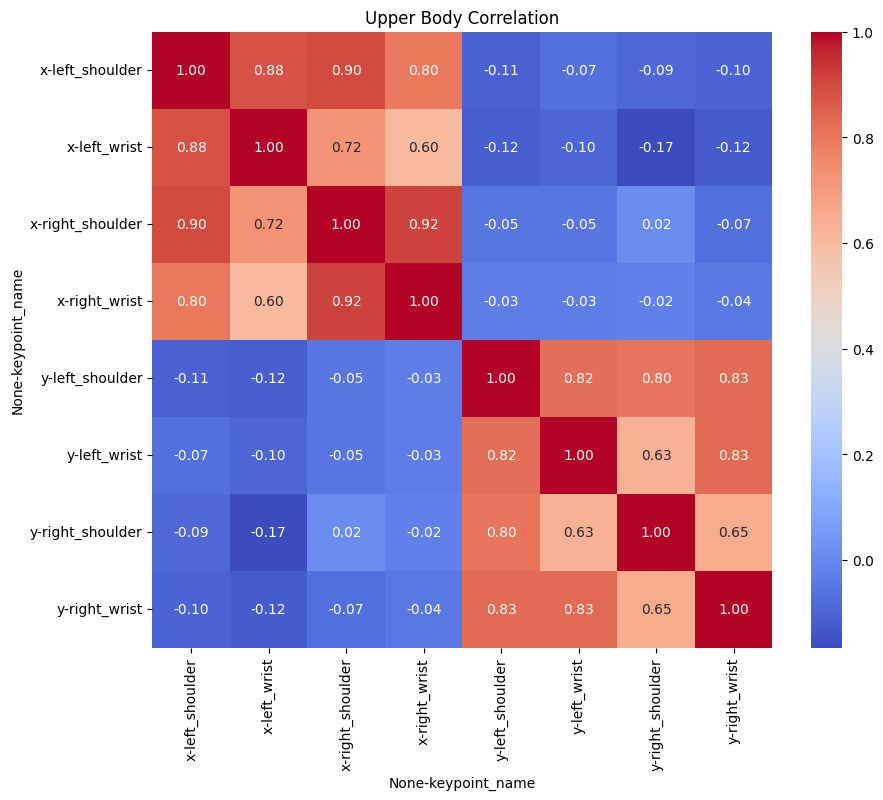

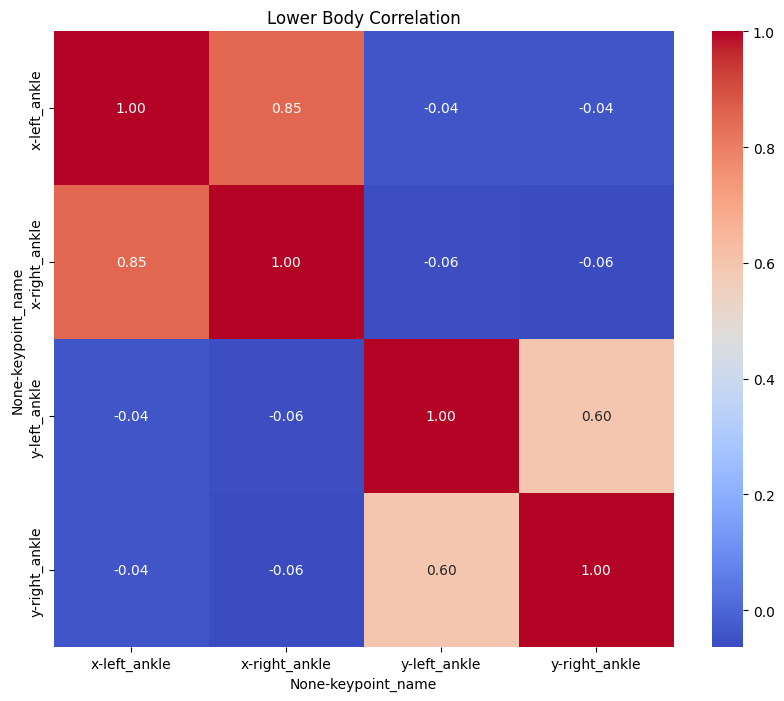

In [11]:
# 상관관계 그룹화 추가 진행

import seaborn as sns
import matplotlib.pyplot as plt

# 상체와 하체 그룹 정의
upper_body = ['left_shoulder', 'right_shoulder', 'left_wrist', 'right_wrist']
lower_body = ['left_knee', 'right_knee', 'left_ankle', 'right_ankle']

# 상관관계 계산
upper_corr = (
    df_filtered[df_filtered['keypoint_name'].isin(upper_body)]
    .pivot_table(index='file_name', columns='keypoint_name', values=['x', 'y'], aggfunc='mean')  # 중복 데이터를 평균으로 처리
    .corr()
)

lower_corr = (
    df_filtered[df_filtered['keypoint_name'].isin(lower_body)]
    .pivot_table(index='file_name', columns='keypoint_name', values=['x', 'y'], aggfunc='mean')  # 중복 데이터를 평균으로 처리
    .corr()
)


# 상체 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(upper_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Upper Body Correlation")
plt.show()

# 하체 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(lower_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Lower Body Correlation")
plt.show()


---

#### 📊 <font color="skyblue">**Analysis 2**</font>

- **(a) 상체 그룹** (어깨, 손목) : left_shoulder, right_shoulder, left_wrist, right_wrist
- **(b) 하체 그룹** (무릎, 발목) : left_knee, right_knee, left_ankle, right_ankle
- **(c) 혼합 그룹** (상체-하체 협응): shoulder ↔ knee, wrist ↔ ankle


##### **1. 히트맵 기반 상관관계 분석**

**(a) 상체 그룹**
- **`left_shoulder` ↔ `right_shoulder` **<font color="orange">**(상관계수 ≈ 0.92~0.94)**</font>   
    - 양쪽 어깨는 상체의 중심 움직임을 반영하며 강한 대칭적 상관관계를 보임
    - 무단횡단할 때 손을 흔들거나 갑작스럽게 팔을 움직이는 행동을 감지할 수 있음

- **`left_wrist` ↔ `right_wrist`**  <font color="orange">**(상관계수 ≈ 0.83~0.85)**</font>  
   - 양쪽 손목은 비슷한 움직임 패턴을 보이며, 손의 흔들림 분석에 유효함

- **`shoulder ↔ wrist 관계`** <font color="orange">**(상관계수 ≈ 0.64~0.78)**</font>   
   - 어깨와 손목의 연관성은 상체의 유기적인 움직임 분석에 활용 가능

<br>

**(b) 하체 그룹**

- **`left_knee` ↔ `right_knee`, `left_ankle` ↔ `right_ankle`** <font color="orange">**(상관계수 ≈ 0.77~0.92)**</font> 
    - 무릎과 발목의 대칭적 움직임은 방향 전환 및 속도 분석에 중요

- **`ankle ↔ knee 관계`** <font color="orange">**(상관계수 ≈ 0.58~0.77)**</font>  
    - 발목과 무릎의 상관관계는 하체 움직임 패턴과 가속도 분석에 유효

<br>

**(c) 혼합 그룹 (상체-하체 관계)**
- 상체(`shoulders`, `wrists`)와 하체(`knees`, `ankles`) 간 상관관계는 비교적 낮음 <font color="orange">**(상관계수 ≈ 0.1~0.3)**</font>  
   - 이는 상체와 하체의 움직임이 독립적으로 동작할 가능성을 시사
   - 단, <font color="orange">돌발 행동 시 상체와 하체가 동시에 강한 움직임</font> 을 보일 가능성을 추가 분석해야 함

<br>

##### **2. 분포 시각화 기반 추가 확인**
- **상체 (어깨와 손목)**
    - 위치 분포가 하체에 비해 더 분산되어 있으며 이는 움직임의 다양성과 유연성을 의미함  

- **하체 (무릎과 발목)**
    - 위치 분포가 상대적으로 밀집되어 있으며 이는 대칭적 움직임과 방향 전환을 명확히 포착할 수 있음을 의미함

<br>

<div style="border-top: 2px solid skyblue;"></div>

#### 💡 <font color="skyblue">**INSIGHT**</font>
##### 🚀 <font color="skyblue">**키포인트 기반 행동 분석: 상체와 하체의 역할**</font>
- 1️⃣ 어깨(left_shoulder, right_shoulder)와 손목(left_wrist, right_wrist)은 상체 움직임의 핵심으로 무단횡단할 때 <font color="skyblue">손을 흔들거나 갑작스럽게 팔을 움직이는 행동을 감지</font>  할 수 있음
- 2️⃣ 무릎(left_knee, right_knee)과 발목(left_ankle, right_ankle)은 대칭적인 움직임이나 방향 전환을 볼 때 중요함 따라서 <font color="skyblue">도로에 빠르게 뛰어들거나 이동 속도가 급격히 변하는 상황을 예측</font>할 수 있음
- 3️⃣ 결론적으로 어깨와 무릎, 손목과 발목처럼 상하체의 연결 관계를 통해 <font color="skyblue">**상체-하체가 동시에 협응해서 나타나는 행동(예: 갑자기 뛰어드는 경우)을 탐지**</font>할 수 있음

<br>

---


### ✅ 4. 키포인트 선택 및 속도 변화 패턴 분석

#### 📌 **분석 목표**  
- 시간에 따른 키포인트의 속도 변화 및 이상 행동 패턴을 분석하여 돌발 행동을 탐지.

### 🛠️ **진행 단계**
**4.1 속도 계산**  
- 시간 순으로 데이터 정렬.  
- 유클리드 거리 기반 속도 계산:  
 $$ \text{속도 (Velocity)} = \frac{\Delta 거리}{\Delta 시간} $$

**4.2 거리 계산**  
- 거리 = $$ \sqrt{\Delta x^2 + \Delta y^2} $$  

**4.3 속도 시각화**
- 특정 키포인트의 시간에 따른 속도 변화를 시각화.  
- 급격한 속도 변화가 발생하는 키포인트를 탐지하여 돌발 행동의 가능성을 분석.






---


In [12]:
import numpy as np

# 데이터 정렬
df_sorted = df_filtered.sort_values(by=['file_name'])

# Δx, Δy, Δ시간 계산
df_sorted['dx'] = df_sorted['x'].diff()
df_sorted['dy'] = df_sorted['y'].diff()
df_sorted['dt'] = 1  # assuming 1 frame per time step

# 유클리드 거리 및 속도 계산
df_sorted['distance'] = np.sqrt(df_sorted['dx']**2 + df_sorted['dy']**2)
df_sorted['velocity'] = df_sorted['distance'] / df_sorted['dt']

# 가속도 계산
df_sorted['acceleration'] = df_sorted['velocity'].diff() / df_sorted['dt']

# 결과 확인
print(df_sorted[['file_name', 'keypoint_name', 'velocity', 'acceleration']].head())


                               file_name  keypoint_name    velocity  \
90920  MC01_A01_B001_CA1_M0001_1005.json           head         NaN   
90935  MC01_A01_B001_CA1_M0001_1005.json    right_ankle  697.938596   
90932  MC01_A01_B001_CA1_M0001_1005.json  left_shoulder  513.262313   
90931  MC01_A01_B001_CA1_M0001_1005.json    right_wrist   60.468591   
90930  MC01_A01_B001_CA1_M0001_1005.json     left_wrist   60.468591   

       acceleration  
90920           NaN  
90935           NaN  
90932 -1.846763e+02  
90931 -4.527937e+02  
90930  3.765876e-13  


---

#### 📊 <font color="skyblue">**Analysis 3**</font>

1. **속도 (velocity)**
- 각 키포인트의 이동 속도를 의미함. 예를 들어 right_ankle의 속도는 약 697.94로 다른 키포인트보다 빠르게 움직였음을 알 수 있음
- NaN : 첫 행에는 속도를 계산할 이전 데이터가 없기 때문에 속도 값이 NaN으로 표시됨

<br>

2. **가속도 (acceleration)**
- 각 키포인트의 속도 변화율(가속도)을 의미함. 예를 들어 left_shoulder의 가속도는 약 -184.68(음수)로 속도가 줄어들고 있음을 알 수 있음
- 가속도 역시 속도의 Nan값과 마찬가지로 계산할 이전 속도 데이터가 없기 때문에 NaN으로 표시됨

<br>

3. **속도와 가속도 값이 작거나 거의 0인 경우**
- left_wrist와 right_wrist의 가속도가 거의 0에 가까운 값(3.765876e-13)으로 나타남
- 이는 움직임 변화가 거의 없거나 데이터 정밀도에 따른 오차범위로 추측함

---

In [ ]:
#속도/가속도 기준으로 데이터를 구간화하고, 그룹별로 분석

import pandas as pd
import numpy as np

# 속도/가속도 구간 설정 함수
def classify_motion(row):
    if row['velocity'] <= 500:
        return 'Normal'
    elif 500 < row['velocity'] <= 1000:
        return 'High Speed'
    else:
        return 'Irregular'

# 각 키포인트별 데이터 분리
keypoints = ['head', 'neck', 'left_shoulder', 'right_shoulder', 
             'left_wrist', 'right_wrist', 'left_ankle', 'right_ankle']

grouped_data = {}
for keypoint in keypoints:
    keypoint_data = df_sorted[df_sorted['keypoint_name'] == keypoint].copy()
    # 속도/가속도 구간 분류
    keypoint_data['motion_category'] = keypoint_data.apply(classify_motion, axis=1)
    grouped_data[keypoint] = keypoint_data

# 상체 그룹, 하체 그룹, 혼합 그룹 정의
upper_body = ['left_shoulder', 'right_shoulder', 'left_wrist', 'right_wrist']
lower_body = ['left_ankle', 'right_ankle']
mixed_body = ['left_shoulder', 'left_ankle', 'right_shoulder', 'right_ankle']

# 상체 그룹 분석
upper_body_data = pd.concat([grouped_data[kp] for kp in upper_body])
upper_summary = upper_body_data['motion_category'].value_counts()

# 하체 그룹 분석
lower_body_data = pd.concat([grouped_data[kp] for kp in lower_body])
lower_summary = lower_body_data['motion_category'].value_counts()

# 혼합 그룹 분석
mixed_body_data = pd.concat([grouped_data[kp] for kp in mixed_body])
mixed_summary = mixed_body_data['motion_category'].value_counts()

# 결과 출력
print("Upper Body Motion Summary:")
print(upper_summary)
print("\nLower Body Motion Summary:")
print(lower_summary)
print("\nMixed Body Motion Summary:")
print(mixed_summary)


Upper Body Motion Summary:
motion_category
Normal        117681
High Speed     22127
Irregular        576
Name: count, dtype: int64

Lower Body Motion Summary:
motion_category
Normal        40874
High Speed    28558
Irregular       760
Name: count, dtype: int64

Mixed Body Motion Summary:
motion_category
Normal        99103
High Speed    40285
Irregular       996
Name: count, dtype: int64


---

#### 📊 <font color="skyblue">**Analysis 4**</font>

1. 상체 그룹 (Upper Body)
- **Normal (정상)**: 117,681개 → 대부분 안정적 움직임.  
- **High Speed (고속)**: 22,127개 (15%) → 팔, 어깨의 급격한 흔들림 감지 가능.  
- **Irregular (비정형)**: 576개 (0.4%) → 돌발 행동의 유의미한 신호.  

2. 하체 그룹 (Lower Body)
- **Normal (정상)**: 40,874개 → 대부분 정상 속도.  
- **High Speed (고속)**: 28,558개 (40%) → 방향 전환, 뛰어들기 등 이동과 관련.  
- **Irregular (비정형)**: 760개 (1.2%) → 돌발 행동의 주요 신호.  


3. 혼합 그룹 (Mixed Body)
- **Normal (정상)**: 99,103개 → 대부분 정상 움직임.  
- **High Speed (고속)**: 40,285개 (29%) → 상체-하체 협응 시 고속 패턴 증가.  
- **Irregular (비정형)**: 996개 (2.4%) → 돌발 행동 가능성이 가장 높은 그룹.  

<br>

<div style="border-top: 2px solid skyblue;"></div>

#### 💡 <font color="skyblue">**INSIGHT**</font>
##### 🚀 <font color="skyblue">**돌발 행동 탐지를 위한 데이터 라벨링 전략**</font>

1️⃣ **상체 vs. 하체 움직임 차이**  
  - 하체는 고속 비율이 높아 이동 관련 행동에 중요한 역할.  
  - 상체의 비정형 움직임은 돌발 행동 예측에 유의미.  

2️⃣ **혼합 그룹의 중요성**  
- 상체-하체 협응에서 비정형 비율이 가장 높아 돌발 행동 탐지 가능성 큼.  

3️⃣ **모델 학습 데이터 라벨링**  
- **Normal (0)**: 정상  
- **High Speed (1)**: 고속  
- **Irregular (2)**: 비정형

<br>

- 위 계획을 바탕으로 라벨링 위해 속도 분포 선 분석 후 threshold(임계값)를 지정하도록 했음

<br>

---

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 속도 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['velocity'], bins=50, kde=True)
plt.title("Velocity Distribution")
plt.xlabel("Velocity")
plt.ylabel("Frequency")
plt.show()

# 속도 박스 플롯
sns.boxplot(df_sorted['velocity'])
plt.title("Velocity Boxplot")
plt.show()


**2.2 키포인트 간의 상관관계 분석**  
- **dancer_height**에 따른 키포인트 위치 패턴의 상관관계를 분석

In [ ]:
import seaborn as sns

# 상관관계 분석
correlation = df[['dancer_height', 'x', 'y']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis between Keypoints and Height')
plt.show()

**2.3 속도 변화 패턴 분석** 
- 시계열 데이터로 변환해 키포인트 속도 계산
    - `속도 = {Δ거리 / Δ시간}`
    - 거리는 유클리드 거리로 계산

In [ ]:
import numpy as np

# 유클리드 거리 계산
def calculate_velocity(x1, y1, x2, y2, delta_time):
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance / delta_time

# 예시 데이터 적용 (두 시점의 데이터)
x1, y1 = df['x'].shift(1), df['y'].shift(1)
x2, y2 = df['x'], df['y']
delta_time = 1  # 시간 간격 (단위 시간)

df['velocity'] = calculate_velocity(x1, y1, x2, y2, delta_time)
display(df[['file_name', 'keypoint_name', 'velocity']])
